# Exploratory Data Analysis - SLID survey

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import data
df = pd.read_csv('../datasets/model_dataset.csv')

## Salary distribution

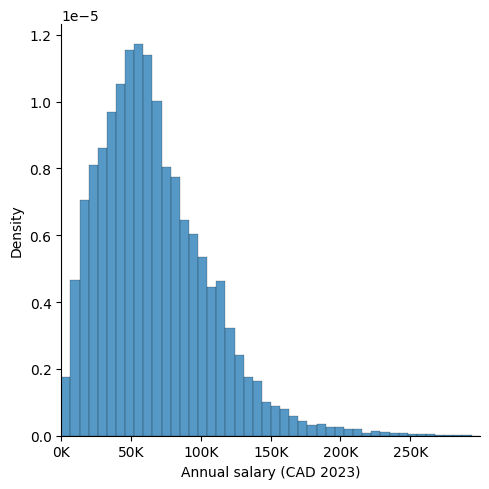

<Figure size 640x480 with 0 Axes>

In [4]:
sns.displot(df['salary'], kde=False, bins=200, stat='density');
plt.xlim(0, 300000);
# plt.ylim(0, 0.0000125);
plt.xlabel("Annual salary (CAD 2023)");
plt.ylabel("Density");

# Set x-axis ticks labels to be in thousands and add a K to the end
plt.xticks(np.arange(0, 300000, 50000), [str(x) + 'K' for x in np.arange(0, 300, 50)]);

fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('../images/ch4_salary_dist/salary_dist.pdf', format='pdf')


In [6]:
df["salary"].median()

60339.33393339334

## Pairplot

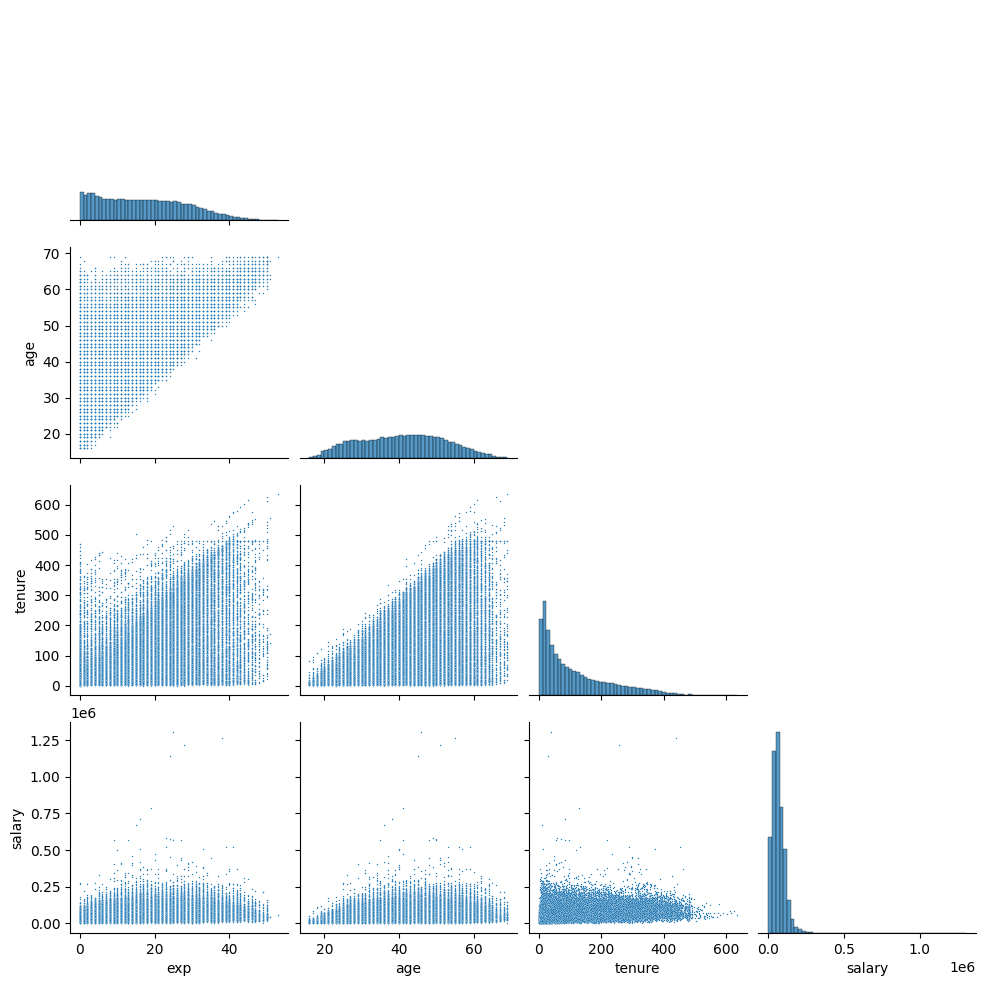

In [6]:
sns.pairplot(df[["exp","age","tenure","salary"]], corner=True, plot_kws={'s':1}, diag_kws={'bins':53});

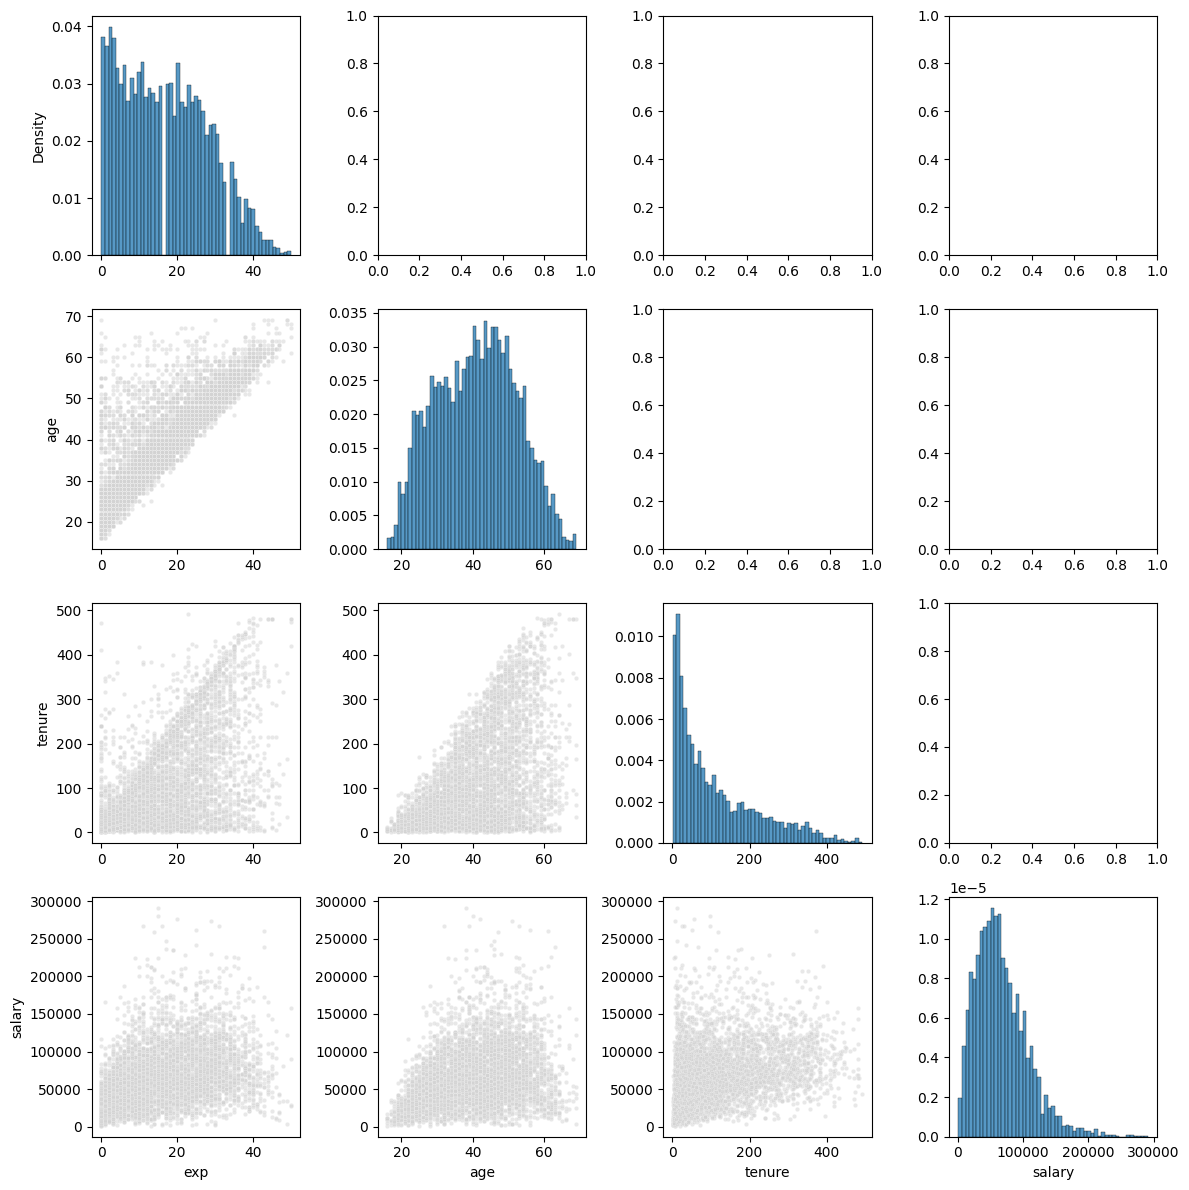

<Figure size 640x480 with 0 Axes>

In [7]:
# Create subplot grid
n = 4
fig, ax = plt.subplots(n, n, figsize=(12, 12))
columns = ['exp', 'age', 'tenure', 'salary']
data = df.sample(5000).query('salary < 300000')[columns].copy()

# Plot each pair of numeric columns
for i in range(n):
    for j in range(n):
        if i == j:
            # Diagonal: histogram or KDE plot
            sns.histplot(data[columns[i]], bins=53, stat="density", ax=ax[i, j])
        elif i > j:
            # Off-diagonal: scatter plot
            sns.scatterplot(data=data, x=columns[j], y=columns[i], s=10, alpha=0.5, color="lightgray", ax=ax[i, j])

        if j > 0:
            ax[i, j].set_ylabel('')
        if i < n - 1:
            ax[i, j].set_xlabel('')

# Adjust layout
plt.tight_layout()
plt.show()

# fig1 = plt.gcf()
plt.show()
plt.draw()
fig.savefig('../images/ch4_pairplot/pairplot.svg', format='svg')
fig.savefig('../images/ch4_pairplot/pairplot.pdf', format='pdf')


## Salaries by specific industry

In [39]:
df.industry.unique()

array(['info/culture', 'trade', 'utilities', 'manufacturing',
       'public admin', 'health/social', 'accommodation/food', 'education',
       'other services', 'transportation', 'finance/real estate',
       'business support', 'construction', 'forestry/oil/mining',
       'scientific/technical', 'agriculture'], dtype=object)

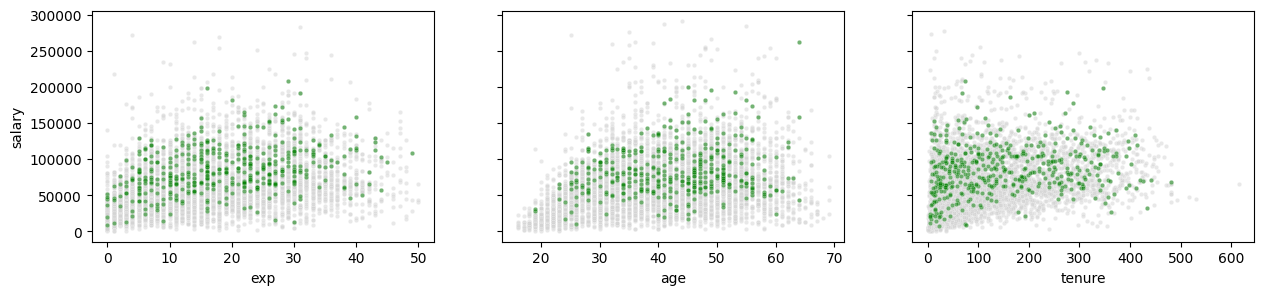

<Figure size 640x480 with 0 Axes>

In [80]:
industry = "public admin"
columns = ['exp', 'age', 'tenure']
data = pd.get_dummies(df, columns=["industry"], drop_first=False) * 1

fig, axes = plt.subplots(1, 3, figsize=(15, 3), sharex=False, sharey=True)

for i, column in enumerate(columns):
    dt = data.sample(5000).query('salary < 300000').copy()
    sns.scatterplot(data=dt, x=column, y='salary', s=10, alpha=0.5, color="lightgray", ax=axes[i])
    sns.scatterplot(data=dt[dt[f"industry_{industry}"]==1], x=column, y='salary', s=10, alpha=0.5, c="green", ax=axes[i])

# fig1 = plt.gcf()
plt.show()
plt.draw()
fig.savefig('../images/ch4_salary_ind/salary_ind.svg', format='svg')
fig.savefig('../images/ch4_salary_ind/salary_ind.pdf', format='pdf')


## Avg. annual salary by industry

In [5]:
ind_cat = [
    'agriculture',
    'forestry/oil/mining',
    'utilities',
    'construction',
    'manufacturing',
    'trade',
    'transportation',
    'info/culture',
    'finance/real estate',
    'scientific/technical',
    'business support',
    'education',
    'health/social',
    'accommodation/food',
    'other services',
    'public admin']

In [6]:
# Calculate avg salary by year
avg_sal_ontario = df.drop(columns=["industry","occup"]).groupby('year').mean()["salary"]

In [7]:
# Calculate avg salary by industry
charts = df.drop(columns=["occup"]).groupby(["industry","year"]).mean()["salary"].unstack()

# sort industries by ind_cat order
charts = charts.reindex(ind_cat)

In [16]:
(charts[2011] / charts[1996])-1

industry
agriculture             0.043121
forestry/oil/mining     0.001256
utilities               0.306594
construction            0.212455
manufacturing           0.111334
trade                   0.102267
transportation          0.088619
info/culture            0.162715
finance/real estate     0.194180
scientific/technical    0.307347
business support       -0.026740
education               0.160862
health/social           0.280061
accommodation/food      0.177850
other services          0.164909
public admin            0.321781
dtype: float64

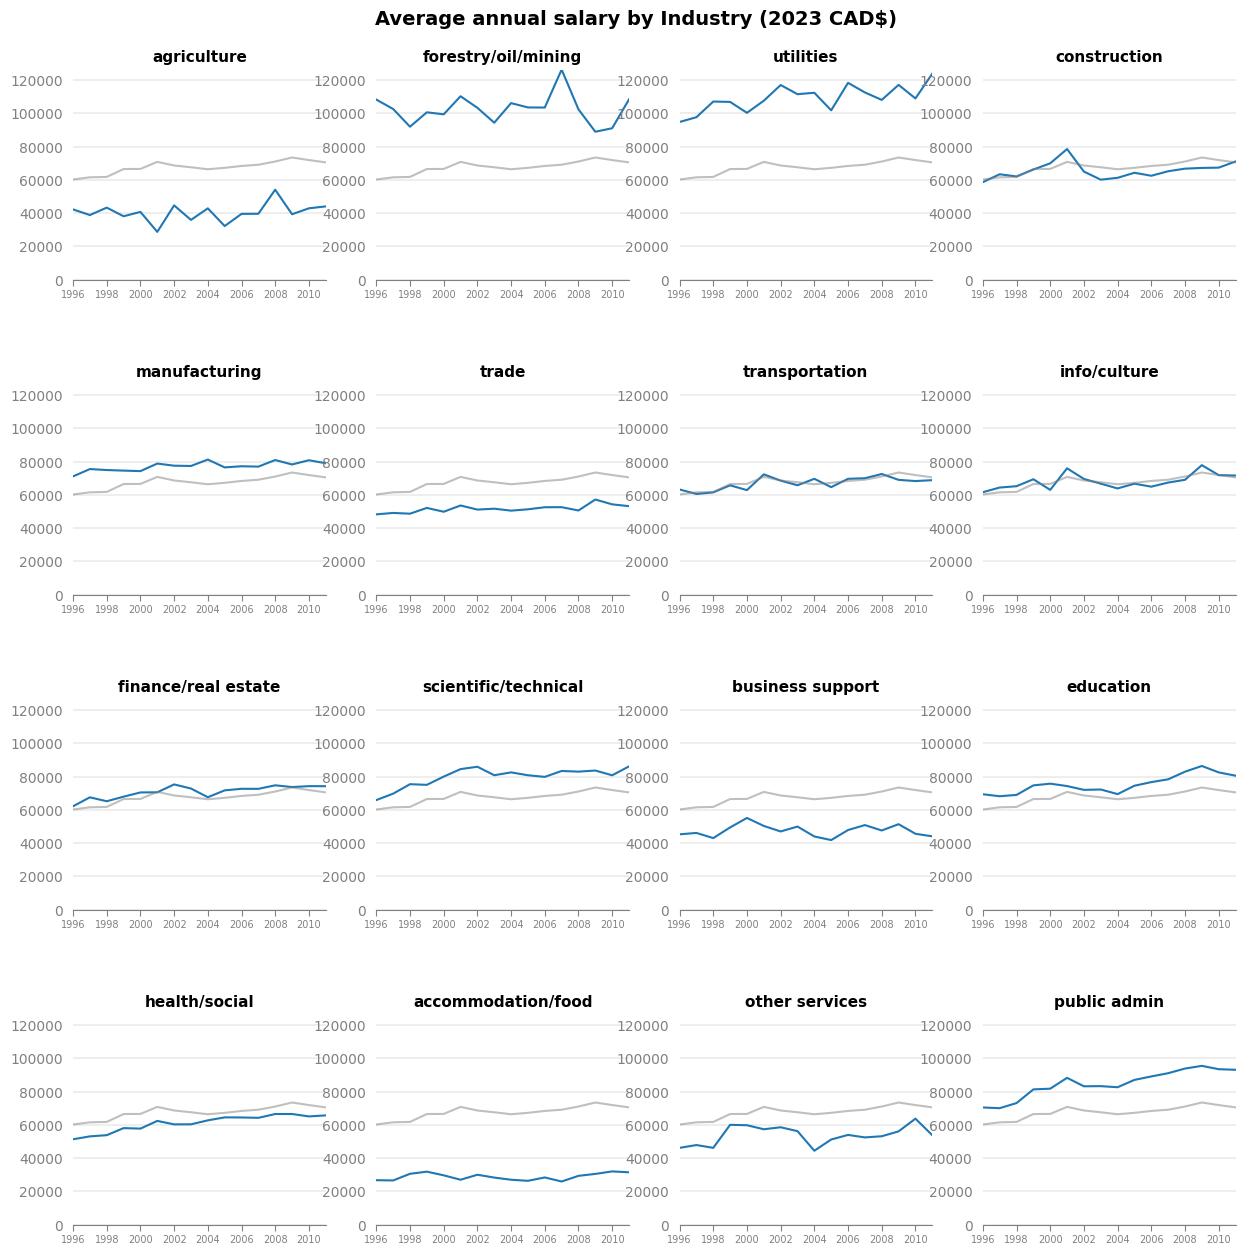

<Figure size 640x480 with 0 Axes>

In [11]:
# Create subplots grid with 7 rows and 3 columns
fig, axes = plt.subplots(4, 4, figsize=(15, 15), sharex=True, sharey=True)

# Get list of industries
industries = ind_cat.copy()

# Calculate the max of all charts
max_chart = charts.max().max()

# For each industry, plot the average annual salary
for i, industry in enumerate(industries):
    # Plot the average annual salary
    axes[i//4, i%4].plot(charts.iloc[i])
    axes[i//4, i%4].plot(avg_sal_ontario, color='grey', alpha=0.5)

    # Adjust space between subplots
    fig.subplots_adjust(hspace=0.5)

    # Adjust the figure title, axes labels, and legend
    axes[i//4, i%4].set_title(f'{industry}', fontsize=11, fontweight='bold')
    # axes[i//4, i%4].legend(['Industry', 'Avg. Ontario'], loc='upper left', fontsize=8).get_frame().set_linewidth(0)

    # Remove x and y labels
    axes[i//4, i%4].set_xlabel('')
    axes[i//4, i%4].set_ylabel('')
    
    # Remove top, right, and left spines
    axes[i//4, i%4].spines['top'].set_visible(False)
    axes[i//4, i%4].spines['right'].set_visible(False)
    axes[i//4, i%4].spines['left'].set_visible(False)
    
    # Set bottom spine to grey
    axes[i//4, i%4].spines['bottom'].set_color('grey')
    
    # Add grid in y-axis and set the color to grey
    axes[i//4, i%4].grid(axis='y', color='grey', linewidth=0.25, alpha=0.75)
    
    # Set color ticks to grey
    axes[i//4, i%4].tick_params(axis='x', colors='grey', size=4)
    axes[i//4, i%4].tick_params(axis='y', colors='grey', size=4)
    
    # Hide y ticks
    axes[i//4, i%4].yaxis.set_ticks_position('none')

    # Set size of tick labels
    axes[i//4, i%4].tick_params(axis='x', labelsize=7)

    # Set x-axis label
    axes[i//4, i%4].xaxis.set_tick_params(labelbottom=True)
    axes[i//4, i%4].yaxis.set_tick_params(labelleft=True)

    # Set y-axis start to 0
    axes[i//4, i%4].set_ylim(0, math.ceil(max_chart))

    # Set x-axis  range from 1996 to 2011
    axes[i//4, i%4].set_xlim(1996, 2011)


# Set title of the figure
fig.suptitle('Average annual salary by Industry (2023 CAD$)', fontsize=14, fontweight='bold', y=0.92)
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('../images/ch4_avg_salary/avg_salary.pdf', format='pdf')


## Salaries by education level and gender

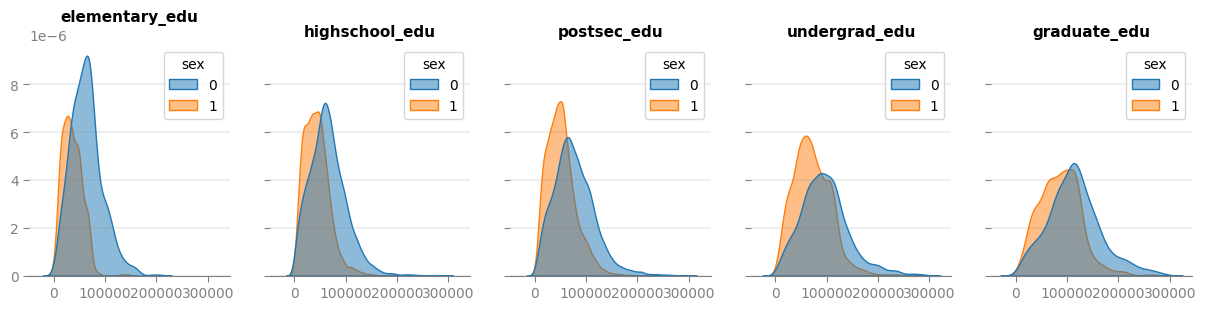

<Figure size 640x480 with 0 Axes>

In [34]:
fig, axes = plt.subplots(1, 5, figsize=(15, 3), sharex=True, sharey=True)

edu_level = ['elementary_edu','highschool_edu','postsec_edu','undergrad_edu','graduate_edu']

for i, edu in enumerate(edu_level):
    sns.kdeplot(data=df.query(f'salary < 300000 and {edu}==1'), x="salary", hue='sex', fill=True, ax=axes[i], alpha=.5)
    axes[i].set_title(f'{edu}', fontsize=11, fontweight='bold')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
    axes[i].spines['left'].set_visible(False)
    axes[i].spines['bottom'].set_color('grey')
    axes[i].grid(axis='y', color='grey', linewidth=0.25, alpha=0.75)
    axes[i].tick_params(axis='x', colors='grey', size=4)
    axes[i].tick_params(axis='y', colors='grey', size=4)

plt.show()
plt.draw()
fig.savefig('../images/ch4_salary_edu_gender/salary_edu_gender.svg', format='svg')
fig.savefig('../images/ch4_salary_edu_gender/salary_edu_gender.pdf', format='pdf')


## Union, sector, and employment type

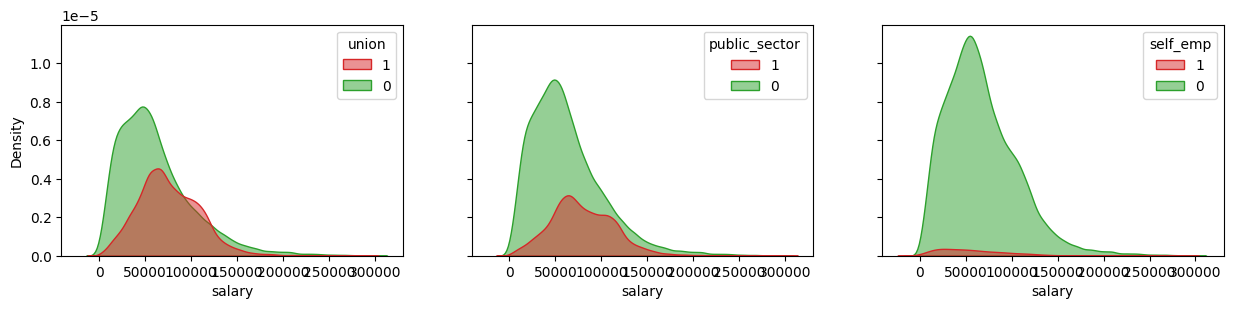

<Figure size 640x480 with 0 Axes>

In [101]:
columns = ["union","public_sector","self_emp"]
colors = ['tab:red', 'tab:green']

fig, axes = plt.subplots(1, 3, figsize=(15, 3), sharex=True, sharey=True)

for i, column in enumerate(columns):
    sns.kdeplot(df.query("salary < 300000"), x="salary", hue=column, hue_order=[1,0], fill=True, ax=axes[i], alpha=.5, palette=colors)

plt.show()
plt.draw()
fig.savefig('../images/ch4_other_fields/other_fields.svg', format='svg')
fig.savefig('../images/ch4_other_fields/other_fields.pdf', format='pdf')